In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv(r'realfishdataset.csv')

# Print the first 5 rows of the dataset
print(df.head())

    ph  temperature  turbidity   fish
0  6.0         27.0        4.0  katla
1  7.6         28.0        5.9   sing
2  7.8         27.0        5.5   sing
3  6.5         31.0        5.5  katla
4  8.2         27.0        8.5  prawn


In [3]:
# Features and target variable
X = df[['ph', 'temperature', 'turbidity']]
y = df['fish']

In [4]:
# Encode target labels (fish types) to numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

TRAINING DIFFERENT MODELS

In [5]:
# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

In [6]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 0.80
XGBoost Accuracy: 0.81
SVM Accuracy: 0.35
Logistic Regression Accuracy: 0.33


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Example variable names - replace these if they differ in your notebook
y_true = y_test  # replace with the actual true label variable
y_pred = model.predict(X_test)  # replace with the actual prediction command or variable

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.2817
Recall: 0.3315
F1 Score: 0.2750


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example variable names - replace these if they differ in your notebook
y_true = y_test  # replace with the actual true label variable
y_pred = model.predict(X_test)  # replace with the actual prediction command or variable

# Calculate class-wise Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Assuming class names are available; otherwise, use class indices
class_names = model.classes_ if hasattr(model, "classes_") else range(len(precision))

print("Class-wise Precision, Recall, and F1-Score:")
for class_name, p, r, f in zip(class_names, precision, recall, f1):
    print(f"Class {class_name} - Precision: {p:.4f}, Recall: {r:.4f}, F1 Score: {f:.4f}")

Class-wise Precision, Recall, and F1-Score:
Class 0 - Precision: 0.5000, Recall: 0.2222, F1 Score: 0.3077
Class 1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Class 2 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Class 3 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Class 4 - Precision: 0.0556, Recall: 0.0526, F1 Score: 0.0541
Class 5 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Class 6 - Precision: 0.2644, Recall: 0.8214, F1 Score: 0.4000
Class 7 - Precision: 0.1667, Recall: 0.1765, F1 Score: 0.1714
Class 8 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Class 9 - Precision: 0.5000, Recall: 0.1875, F1 Score: 0.2727
Class 10 - Precision: 0.6429, Recall: 0.6585, F1 Score: 0.6506


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


USER INPUT

In [7]:
# Function to predict the fish type using the chosen model
def predict_fish(model_name, pH, temperature, turbidity):
    model = models.get(model_name)
    if model:
        prediction = model.predict([[pH, temperature, turbidity]])
        return le.inverse_transform(prediction)[0]
    else:
        return "Invalid model selected!"

# Show available fish classes for prediction
print("Available fish classes for prediction:")
print(le.classes_)

# Show available models for prediction
print("\nChoose a model for prediction:")
print("1. Random Forest")
print("2. XGBoost")
print("3. SVM")
print("4. Logistic Regression")

# Get user input for model choice
choice = int(input("Enter the number corresponding to your model choice: "))

# Map choices to model names
model_map = {
    1: 'Random Forest',
    2: 'XGBoost',
    3: 'SVM',
    4: 'Logistic Regression'
}
selected_model = model_map.get(choice)

# Get water parameters from the user
pH = float(input("Enter the pH level of the water: "))
temperature = float(input("Enter the temperature of the water (in °C): "))
turbidity = float(input("Enter the turbidity of the water: "))

# Display the selected model and input values
print(f"\nYou selected: {selected_model}")
print(f"Input values:\n - pH: {pH}\n - Temperature: {temperature}°C\n - Turbidity: {turbidity}")

# Predict and display the result
if selected_model:
    fish = predict_fish(selected_model, pH, temperature, turbidity)
    print(f"\nThe water conditions are suitable for: {fish}")
else:
    print("Invalid model selection.")


Available fish classes for prediction:
['karpio' 'katla' 'koi' 'magur' 'pangas' 'prawn' 'rui' 'shrimp'
 'silverCup' 'sing' 'tilapia']

Choose a model for prediction:
1. Random Forest
2. XGBoost
3. SVM
4. Logistic Regression


Enter the number corresponding to your model choice:  1
Enter the pH level of the water:  8.2
Enter the temperature of the water (in °C):  27.0
Enter the turbidity of the water:  8.5



You selected: Random Forest
Input values:
 - pH: 8.2
 - Temperature: 27.0°C
 - Turbidity: 8.5

The water conditions are suitable for: prawn


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


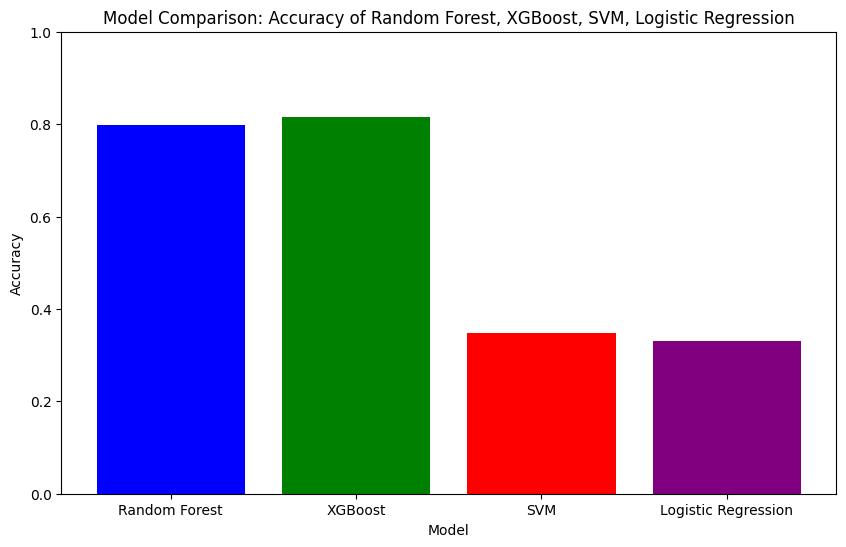

In [8]:
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison: Accuracy of Random Forest, XGBoost, SVM, Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


CONFUSION MATRIX

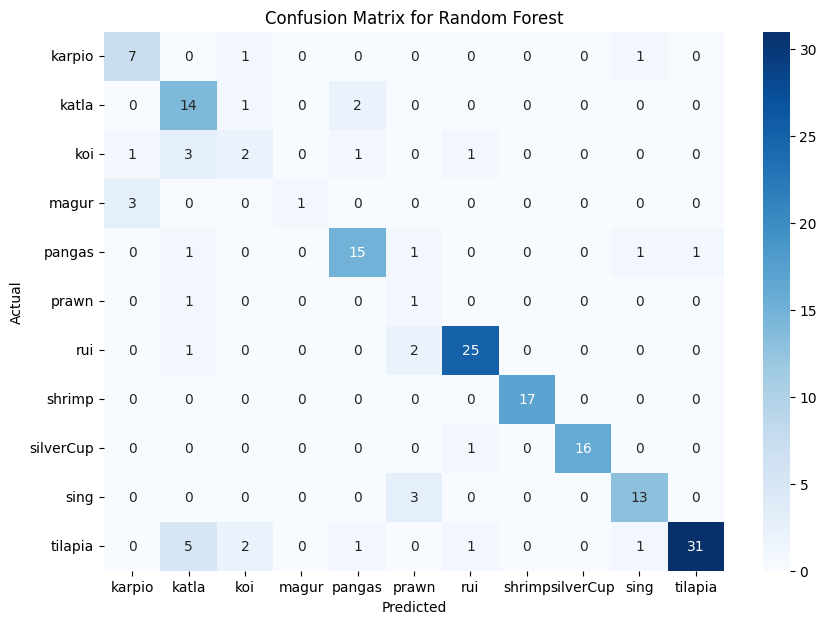

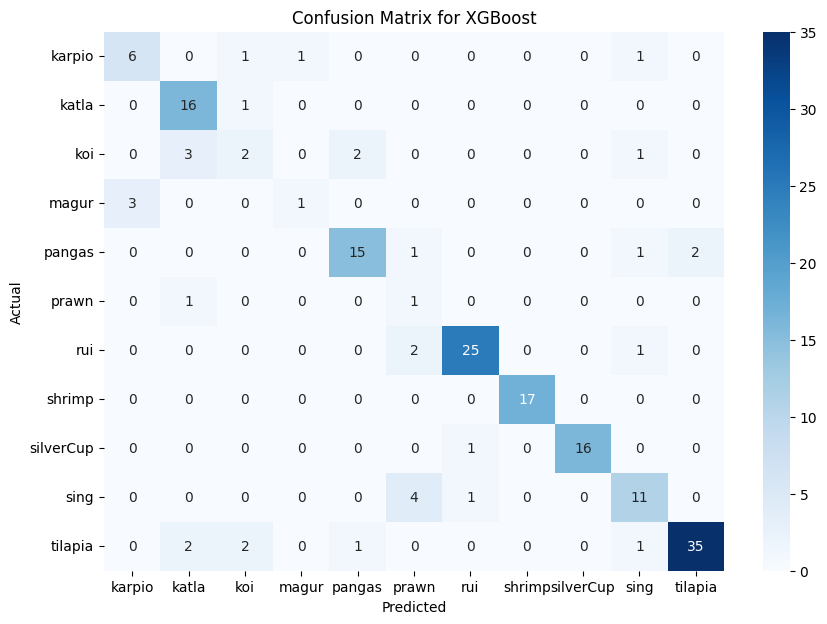

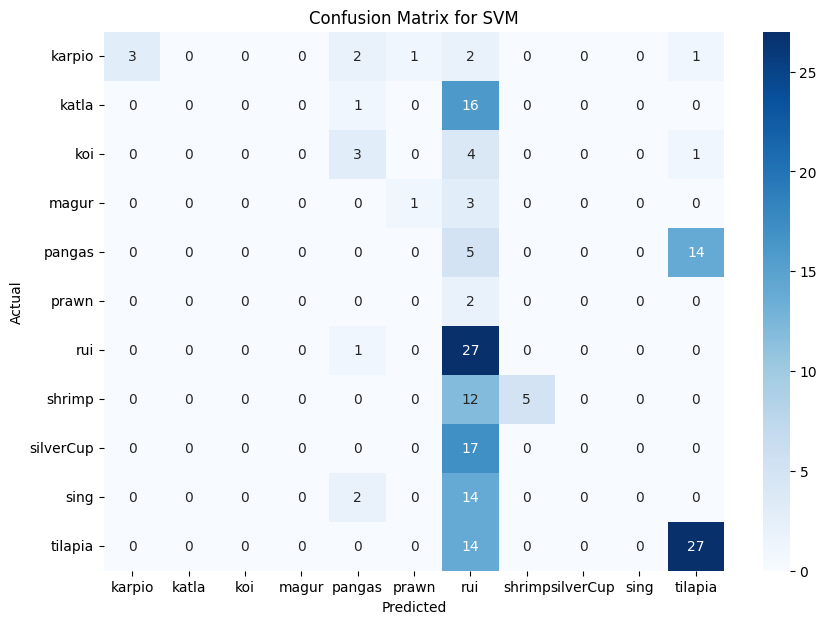

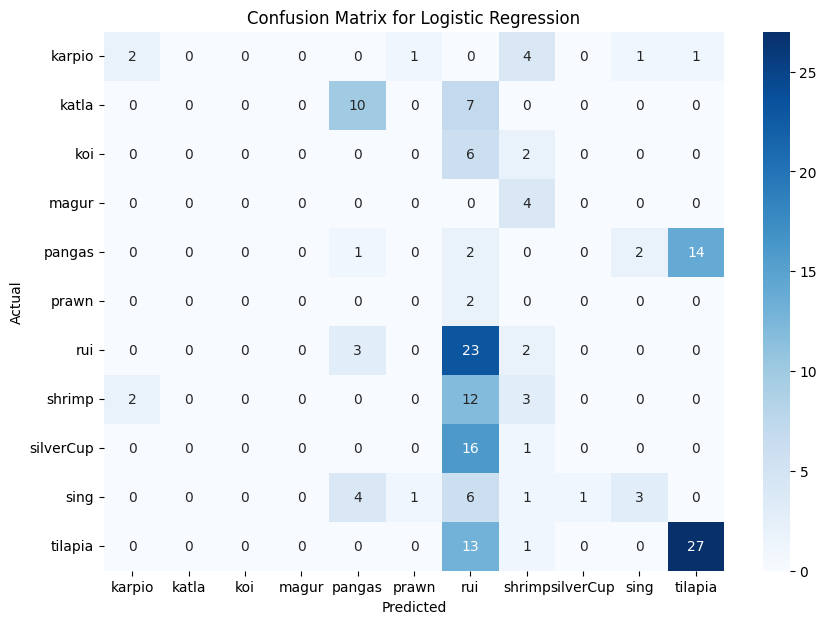

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)

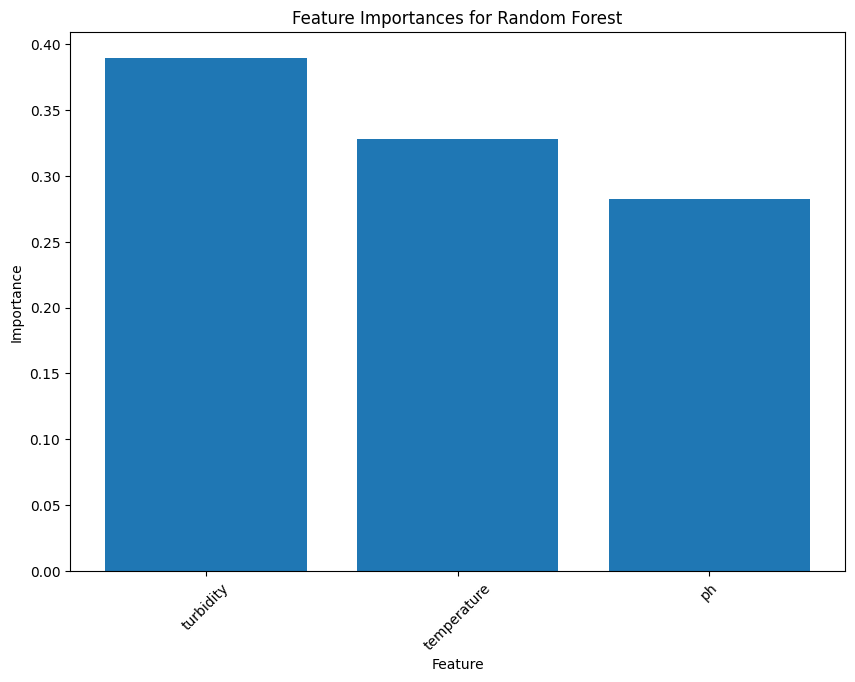

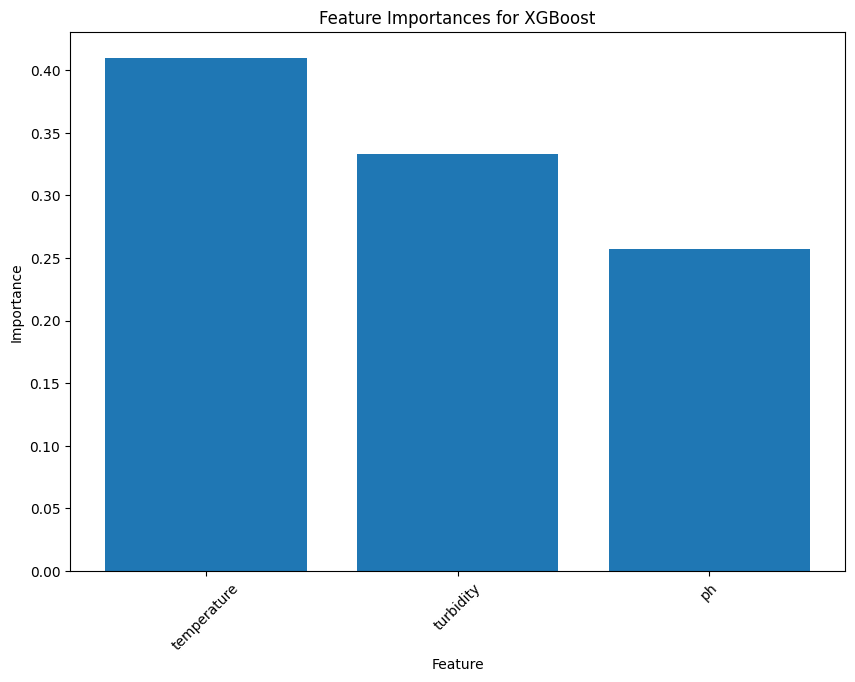

In [10]:
# Function to plot feature importance
def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns
        indices = importances.argsort()[::-1]
        
        plt.figure(figsize=(10, 7))
        plt.title(f'Feature Importances for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), features[indices], rotation=45)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()

# Plot feature importance for Random Forest and XGBoost (models that support it)
plot_feature_importance(models['Random Forest'], 'Random Forest')
plot_feature_importance(models['XGBoost'], 'XGBoost')


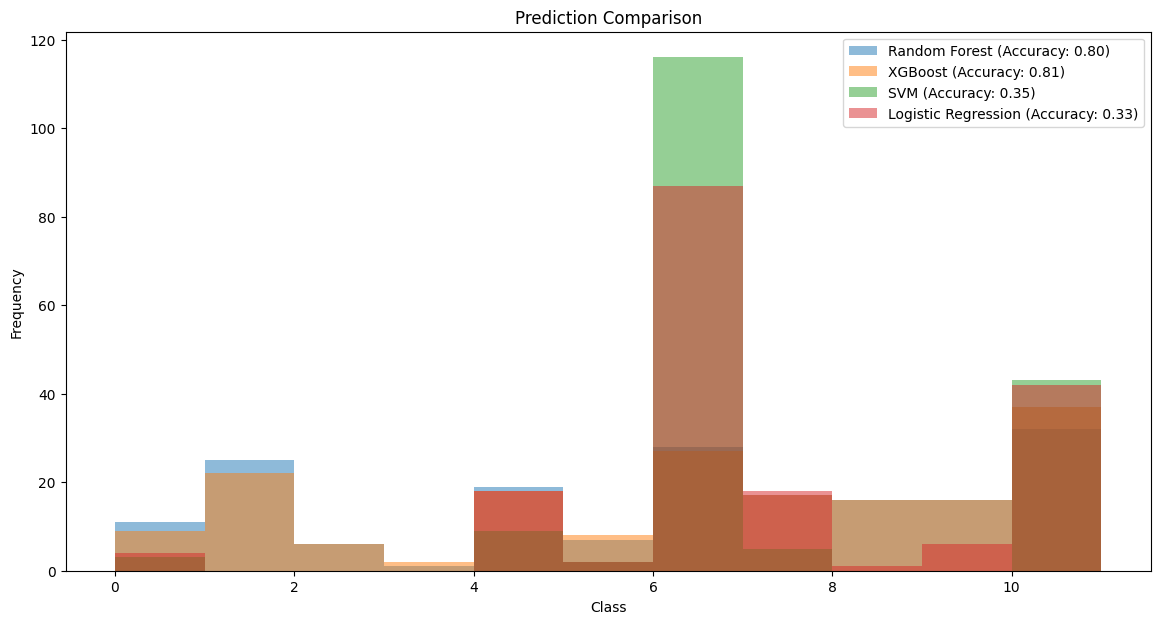

In [11]:
# Function to plot prediction comparison
def plot_prediction_comparison(X_test, y_test):
    plt.figure(figsize=(14, 7))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        plt.hist(y_pred, bins=range(len(le.classes_)+1), alpha=0.5, label=f'{name} (Accuracy: {accuracy:.2f})')
    plt.title('Prediction Comparison')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    plt.show()

# Plot prediction comparison
plot_prediction_comparison(X_test, y_test)

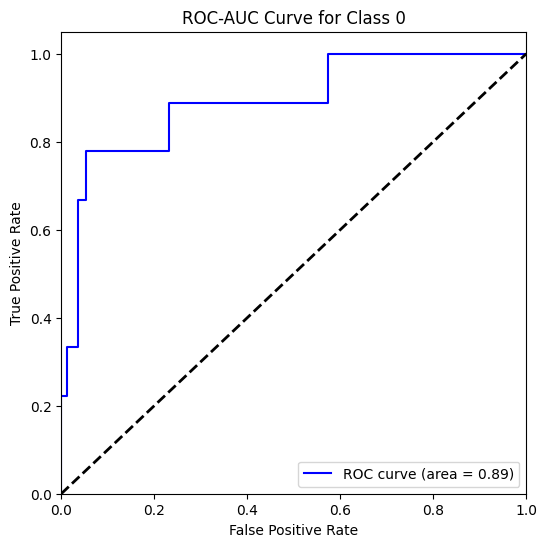

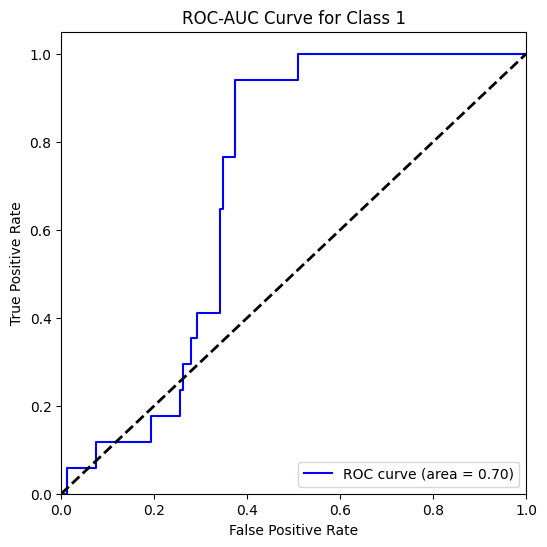

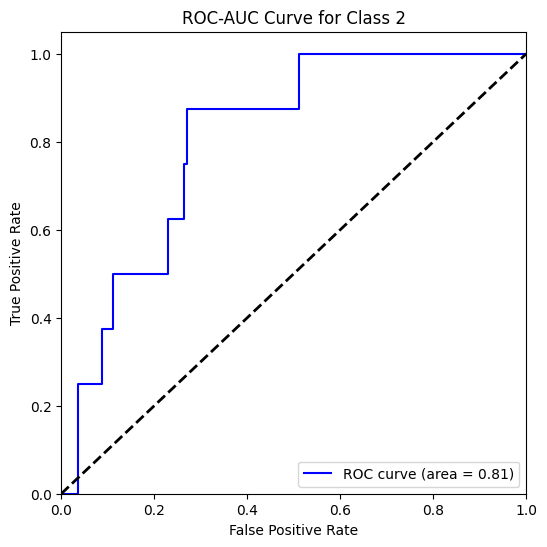

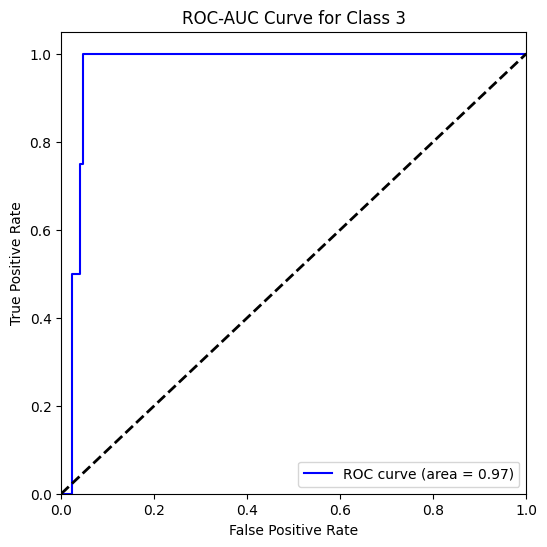

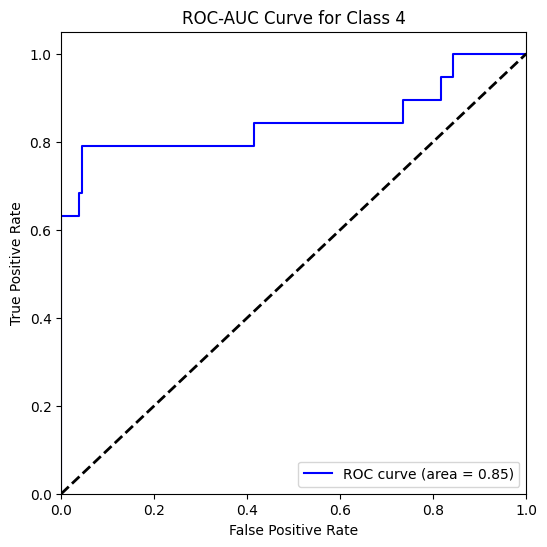

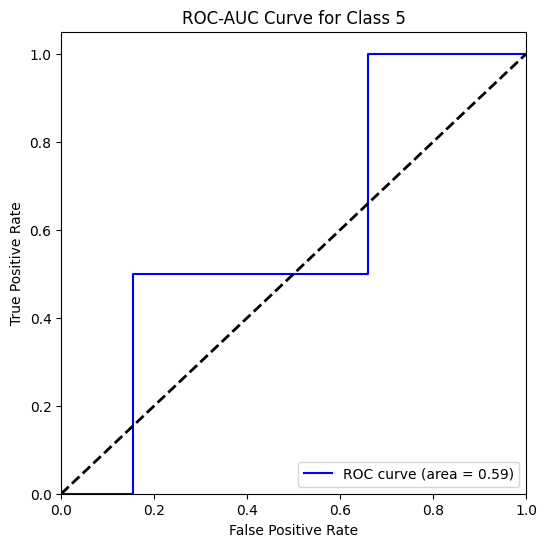

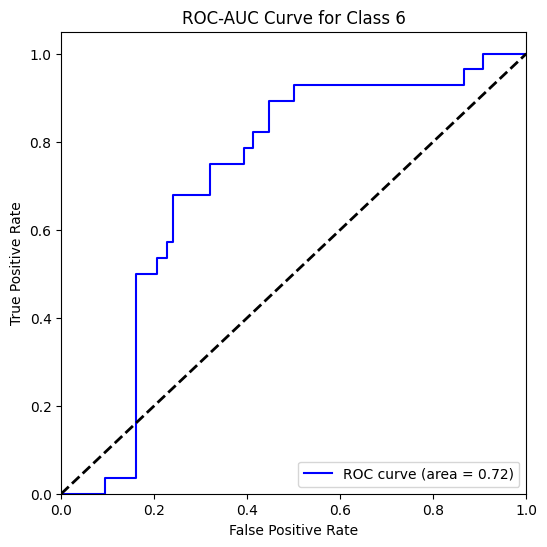

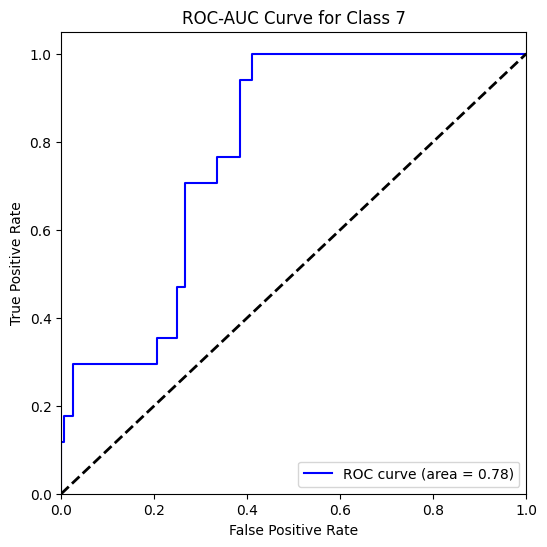

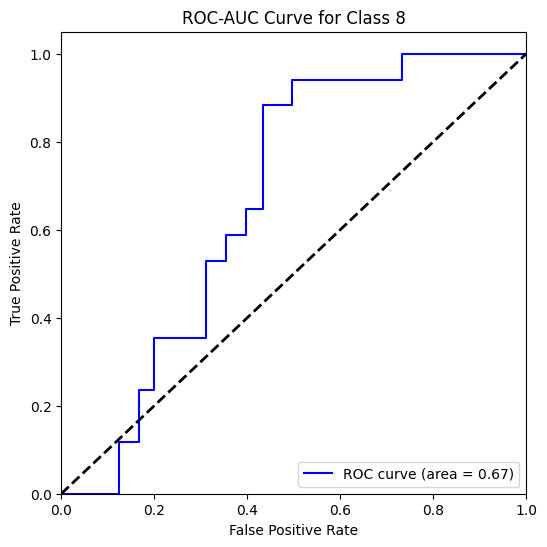

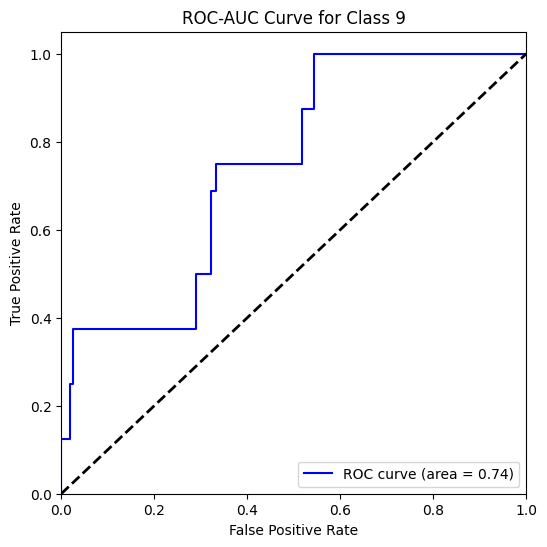

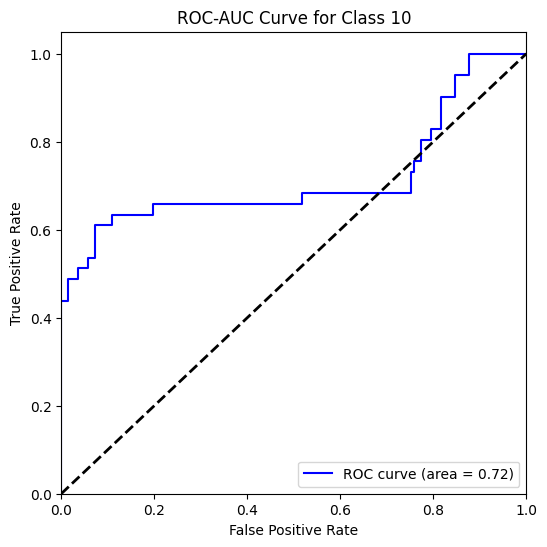

In [12]:
# Generate prediction probabilities (ensure your model supports predict_proba)
y_pred_prob = model.predict_proba(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plot ROC curve for each class separately
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot for the individual class
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve for Class {i}')
    plt.legend(loc="lower right")
    plt.show()

Random Forest ROC AUC Score: 0.97
XGBoost ROC AUC Score: 0.97
SVM ROC AUC Score: 0.80
Logistic Regression ROC AUC Score: 0.77


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


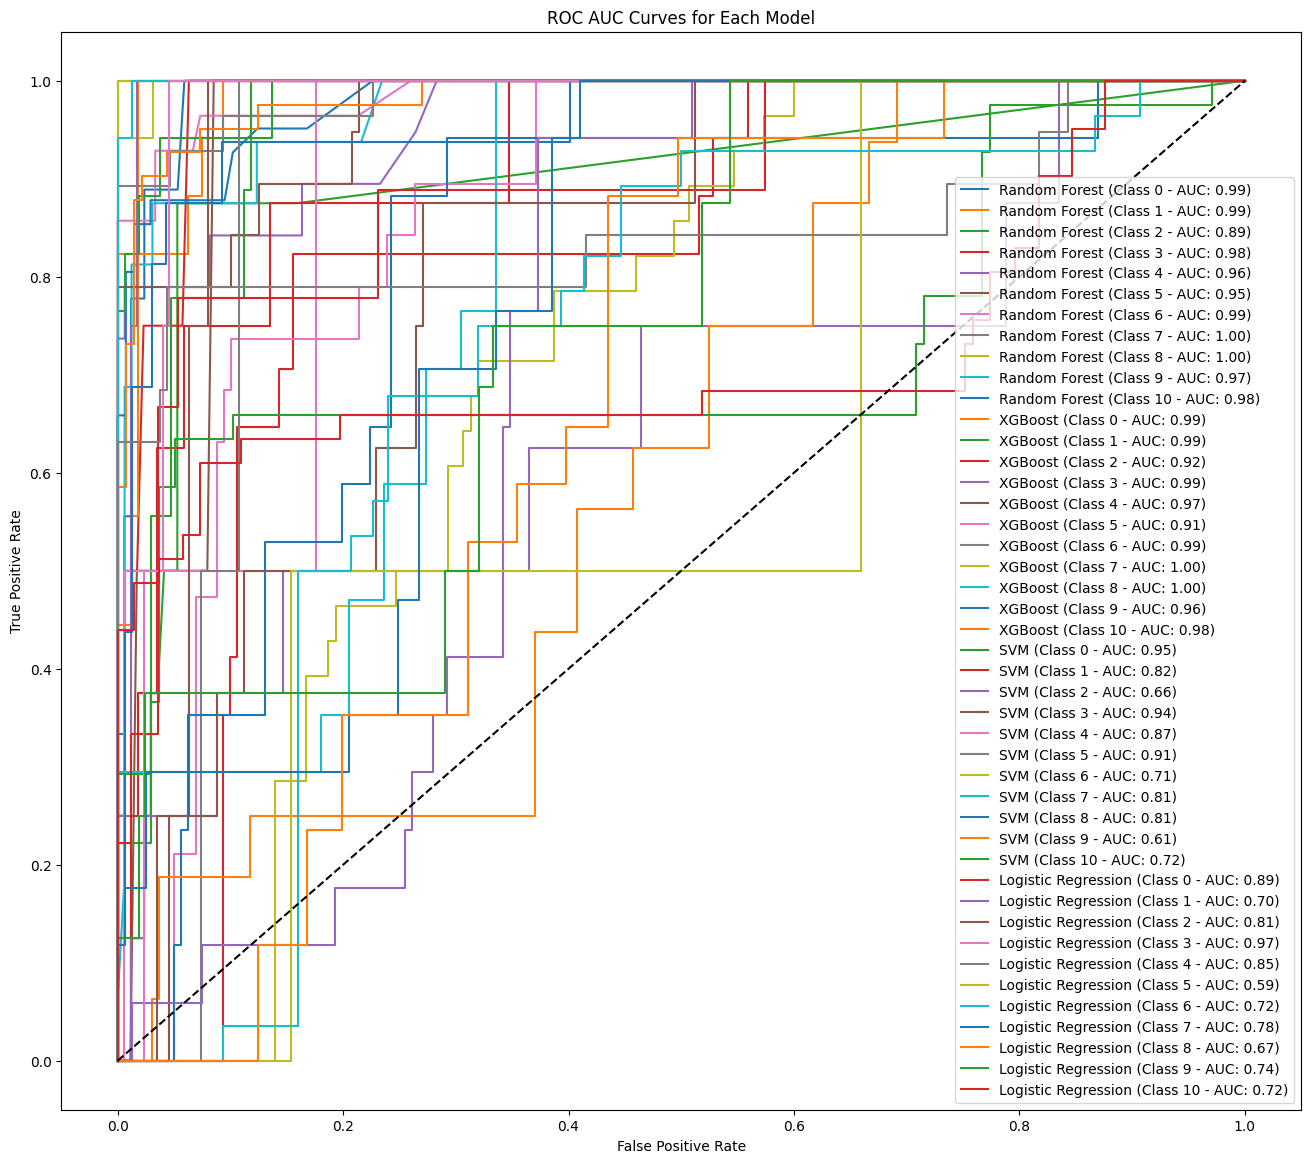

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming `y_test` and `y_pred` are already defined
# Binarize the output labels for multi-class (if necessary)
y_test_bin = label_binarize(y_test, classes=list(range(len(set(y_test)))))

# Dictionary to store ROC AUC scores
roc_auc_scores = {}

plt.figure(figsize=(16, 14))

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Check if the model has `predict_proba` attribute for probability predictions
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        # For models without predict_proba, use decision_function if available
        if hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            continue  # Skip model if neither predict_proba nor decision_function is available

    # Calculate ROC curve and AUC for each class
    roc_auc_score_model = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    roc_auc_scores[name] = roc_auc_score_model
    
    for i in range(y_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{name} (Class {i} - AUC: {auc(fpr, tpr):.2f})")
    
    print(f'{name} ROC AUC Score: {roc_auc_score_model:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Each Model")
plt.legend(loc="best")
plt.show()